---
# Predicting Credit Card Default
### Model Development: Exploring methods and hiperparameters

---


Sections:
- [Loading Preprocessed Data](#Loading-Data)
- [Validation Set Partitioning](#Set-Partitioning)
- [Model Development](#Model-Development)
    - [Decision Tree](#Model-Tree)
    - [Random Forest](#Model-Forest)    
    - [AdaBoosting](#Model-AdaBoosting)
    - [Neural Network](#Model-NN) 
    - [SVM with RBF kernel](#Model-SVM) 
- [Model Evaluation](#Model-Evaluation)
    - [Decision Tree](#Model-Tree-eval)
    - [Random Forest](#Model-Forest-eval)    
    - [AdaBoosting](#Model-AdaBoosting-eval)
    - [Neural Network](#Model-NN-eval) 
    - [SVM with RBF kernel](#Model-SVM-eval) 
    


<a id="Loading-Data"></a>
# Loading  preprocessed data

Note: 
Open <a href="./data_preparation.ipynb">data_preparation.ipynb</a> to see how the data was preprocessed. 

In [2]:
import pandas as pd
import numpy as np
import imblearn #libary for imbalanced functions i.e. K-means SMOTE
from sklearn import preprocessing

#from google.colab import drive
#drive.mount('/content/drive')
# filename = "drive/Shareddrives/DS-project/default_processed.csv"

filename = "default_processed.csv"
data = pd.read_csv(filename)
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2.0,2.0,1.0,24,2,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26,-1,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34,0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37,0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57,-1,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,50000.0,1.0,1.0,2.0,37,0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,500000.0,1.0,1.0,2.0,29,0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,100000.0,2.0,2.0,2.0,23,0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,140000.0,2.0,3.0,1.0,28,0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,20000.0,1.0,3.0,2.0,35,-2,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


<a id="Set-Partitioning"></a>
# Validation Set Partitioning

Let's split our data into training and test sets, using an 80-20 split. We will stratify the test set so that it contains approximately the same percentage of samples of each target class as the complete set.

In [3]:
from sklearn.model_selection import train_test_split

features = data.iloc[:, :-1] 
label = data.iloc[:,[-1]] 

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify=label, random_state=10)

### Oversampling using SMOTE

One way to fight the inbalance *training set* is to generate new samples in the classes which are under-represented. 

The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.

**over-sample**
> Object to over-sample the minority class(es) by picking samples at random with replacement.

/home/priscila/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


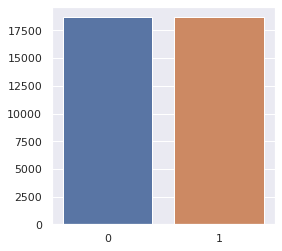

In [4]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder() #This transformer should be used to encode target values, i.e. y,

#encode the training target variable
y_train_encoded = le.fit_transform(y_train['DEFAULT']) 

#oversampling using SMOTE
oversample = SMOTE(random_state=42) 
X_smote, y_smote = oversample.fit_resample(X_train, y_train_encoded)

index,counts = np.unique(y_smote, return_counts=True) #
sns.set(rc={'figure.figsize':(4.0,4.0)})
sns.barplot(index, counts)
plt.show()


<a id="Model-Development"></a>
# Model Development

---


Auxiliar Functions

In [5]:
def model_predict(classifier, X_train, y_train, X_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)
    return y_pred, y_prob[:, 1]

def plot_feature_importance(classifier):
    feature_importance = classifier.feature_importances_
    importance = pd.Series(feature_importance)
    #importance.plot.bar()

    df = pd.DataFrame({'features': X_train.columns, 'importance': importance})
    sns.set(rc={'figure.figsize':(14,8.27)})
    ax = sns.barplot(x="importance", y="features", data=df)


<a id="Model-Tree"></a>
## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
y_pred_tree = {}
y_prob_tree = {}

### Decision Tree: original data

In [7]:
y_pred_tree['Original'], y_prob_tree['Original']= model_predict(tree, X_train, y_train, X_test)
 

Let's visualize the feature importance. This value is the average decrease in impurity

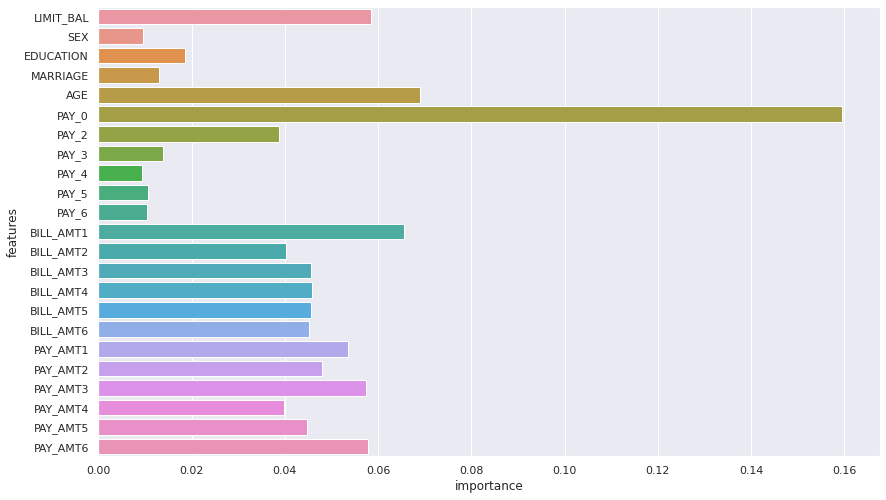

In [8]:
plot_feature_importance(tree)

### Decision Tree: K-means SMOTE data

In [9]:
y_pred_tree['SMOTE'], y_prob_tree['SMOTE'] = model_predict(tree, X_smote, y_smote, X_test)

Let's visualize the feature importance. This value is the average decrease in impurity

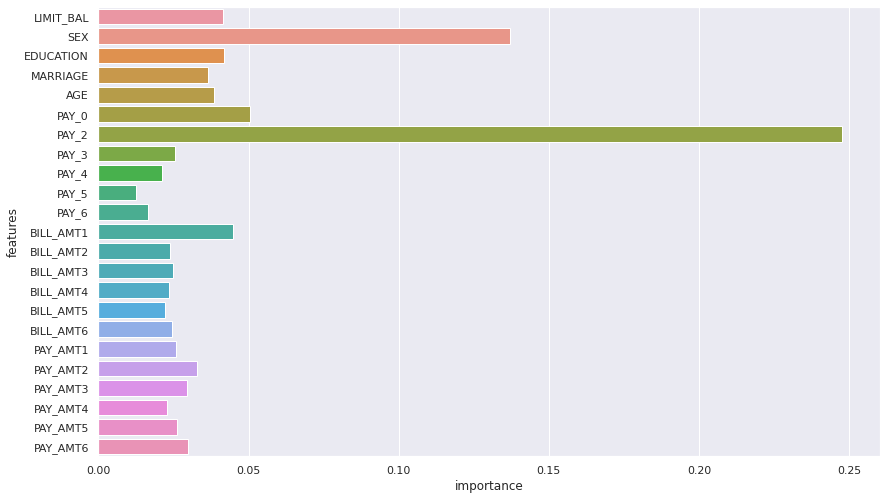

In [10]:
plot_feature_importance(tree)


<a id="Model-Forest"></a>
## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, random_state=0)
y_pred_forest = {}
y_prob_forest = {}

### Random Forest: original data

In [12]:
y_pred_forest['Original'], y_prob_forest['Original'] = model_predict(forest, X_train, np.ravel(y_train.values), X_test)

Let's visualize the feature importance. This value is the average decrease in impurity

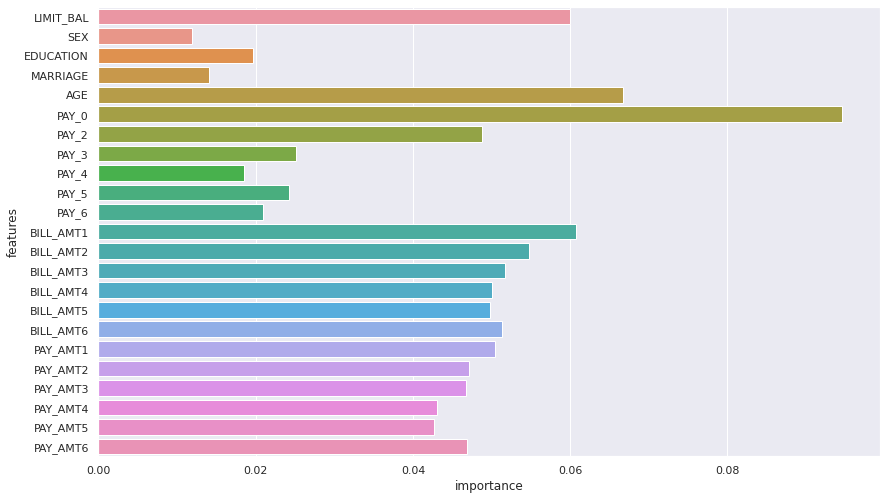

In [13]:
plot_feature_importance(forest)

### Random Forest: SMOTE data

In [14]:
y_pred_forest['SMOTE'], y_prob_forest['SMOTE'] = model_predict(forest, X_smote, y_smote, X_test)

Let's visualize the feature importance. This value is the average decrease in impurity

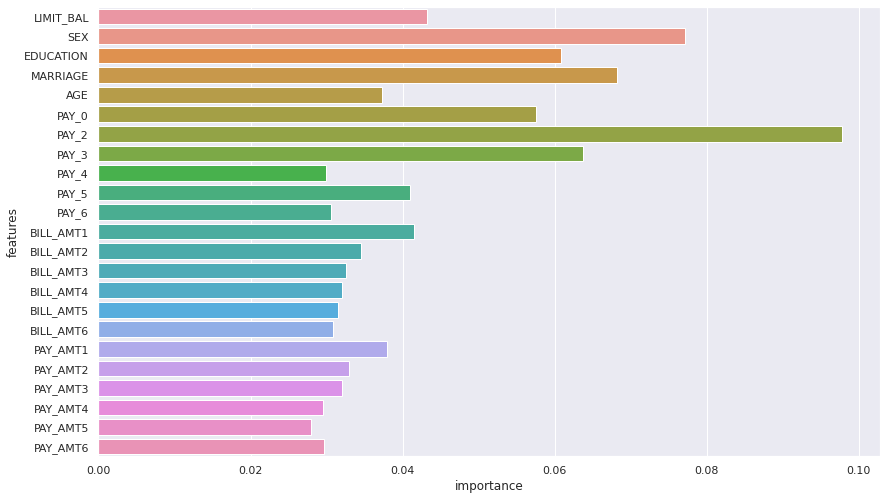

In [15]:
plot_feature_importance(forest)


<a id="Model-AdaBoosting"></a>
## AdaBoosting

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred_adaboost = {}
y_prob_adaboost = {}

### AdaBoosting: original data

In [17]:
y_pred_adaboost['Original'], y_prob_adaboost['Original'] = model_predict(adaboost, X_train, np.ravel(y_train.values), X_test)

Let's visualize the feature importance. This value is the average decrease in impurity

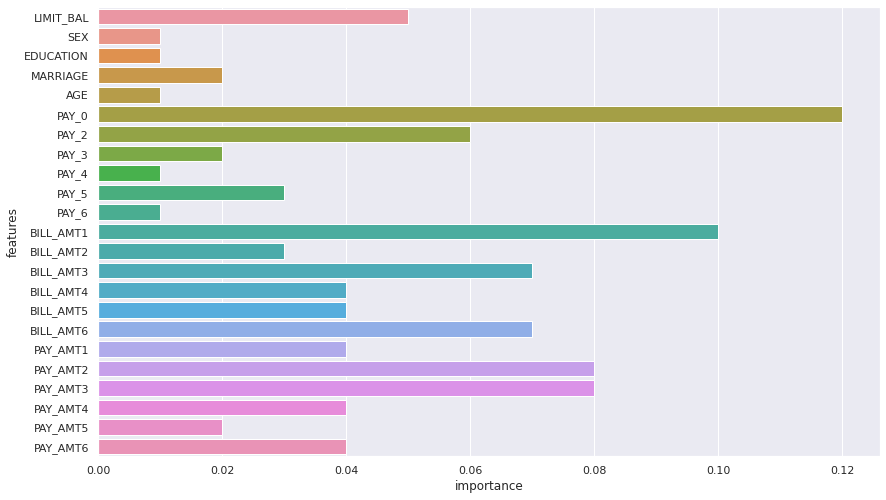

In [18]:
plot_feature_importance(adaboost)

### AdaBoosting: SMOTE data

In [19]:
y_pred_adaboost['SMOTE'], y_prob_adaboost['SMOTE'] = model_predict(adaboost, X_smote, y_smote, X_test)

Let's visualize the feature importance. This value is the average decrease in impurity

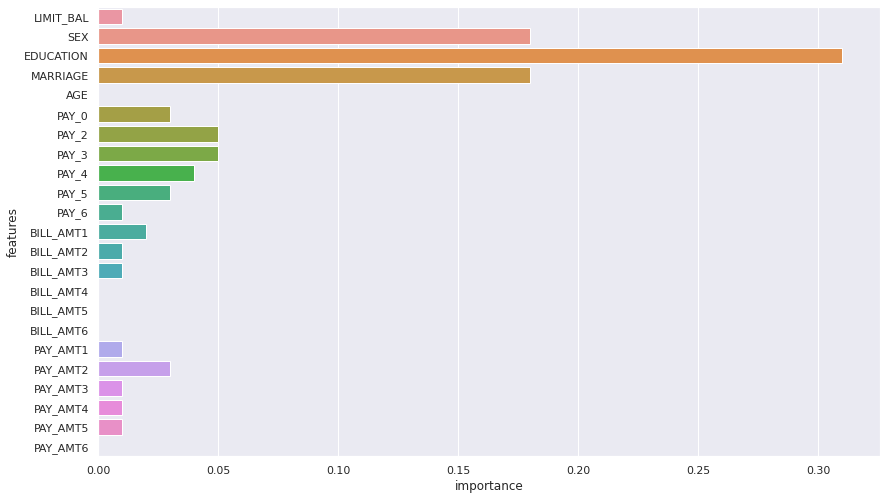

In [20]:
plot_feature_importance(adaboost)

<a id="Model-NN"></a>
## Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

y_pred_nn = {}
y_prob_nn = {}
def nn_predict(X_train, y_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_nn = scaler.transform(X_train)
    X_test_nn = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(25,15), activation='logistic', random_state=1, max_iter=700)
    mlp.fit(X_train_nn, y_train)

    y_pred = mlp.predict(X_test_nn)
    y_prob = mlp.predict_proba(X_test_nn)

    return y_pred, y_prob[:, 1]

### Neural Network: original data

In [22]:
y_pred_nn['Original'],y_prob_nn['Original'] = nn_predict(X_train, np.ravel(y_train.values), X_test)

### Neural Network: SMOTE data

In [23]:
y_pred_nn['SMOTE'], y_prob_nn['SMOTE'] = nn_predict(X_smote, y_smote, X_test)

<a id="Model-SVM"></a>
## SVM with RBF kernel

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svm_rbf_kernel = SVC(probability=True)
y_pred_svm_rbf = {}
y_prob_svm_rbf = {}

### SVM with RBF kernel: original data

In [25]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train_svm = scaler.transform(X_train)
X_test_svm = scaler.transform(X_test)

y_pred_svm_rbf['Original'], y_prob_svm_rbf['Original'] = model_predict(
    svm_rbf_kernel, 
    X_train_svm, 
    y_train, 
    X_test_svm)

/home/priscila/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### SVM with RBF kernel: SMOTE data

In [26]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_smote)
X_train_smote_svm = scaler.transform(X_smote)
X_test_smote_svm = scaler.transform(X_test)

y_pred_svm_rbf['SMOTE'], y_prob_svm_rbf['SMOTE'] = model_predict(
    svm_rbf_kernel, 
    X_train_smote_svm, 
    y_smote, 
    X_test_smote_svm)

<a id="Model-Evaluation"></a>
# Model Evaluation

---

Auxiliar Functions 

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
from cf_matrix import make_confusion_matrix
import sys  
sys.path.insert(0, './')
from cf_matrix import *

# parameters for confusion matrix
labels = ["TN","FP","FN","TP"]
categories = ["0-No", "1-Yes"]
sns.set(rc={'figure.figsize':(4,2)})
title = "Prediction for 'default payment next month'"

def plot_ROC(y_test_encoded, y_pred):
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='cadetblue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='sandybrown', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

def cf_matrix_heatmap(y_test_encoded, y_pred):
    cf_matrix = confusion_matrix(y_test_encoded,y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='icefire')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

def evaluate(y_pred, y_prob, do_plot_ROC=True):
    classes = ['No Default', 'Default']
    y_test_encoded = le.fit_transform(y_test['DEFAULT']) 
  
  
    print(classification_report(y_test_encoded,y_pred, target_names=classes))
    print("Accuracy: %0.2f%%" % (accuracy_score(y_test_encoded,y_pred)*100))
    print("Confusion Matrix:")

    #cf_matrix_heatmap(y_test_encoded, y_pred)
    make_confusion_matrix(confusion_matrix(y_test_encoded, y_pred),
                      group_names=labels,
                      categories=categories, 
                      cmap='icefire',
                      sum_stats=False,
                      count=True,
                      title=title,
                      cbar=True)

    if do_plot_ROC:
        plot_ROC(y_test['DEFAULT'], y_prob)
  



<a id="Model-Tree-eval"></a>
## Decision Tree Evaluation

### Decision Tree: original data

              precision    recall  f1-score   support

  No Default       0.83      0.82      0.82      4673
     Default       0.39      0.42      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000

Accuracy: 72.72%
Confusion Matrix:


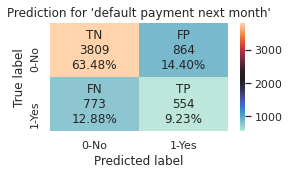

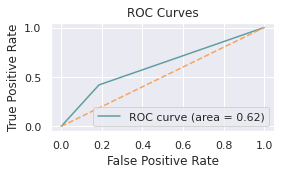

In [28]:
evaluate(y_pred_tree["Original"], y_prob_tree["Original"])

### Decision Tree: SMOTE data

              precision    recall  f1-score   support

  No Default       0.84      0.80      0.82      4673
     Default       0.39      0.45      0.42      1327

    accuracy                           0.73      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.74      0.73      0.73      6000

Accuracy: 72.55%
Confusion Matrix:


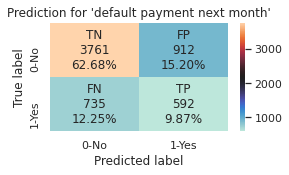

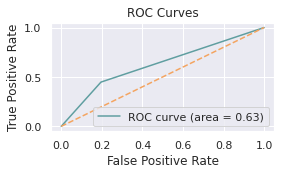

In [29]:
evaluate(y_pred_tree["SMOTE"], y_prob_tree["SMOTE"])

<a id="Model-Forest-eval"></a>
## Random Forest Evaluation

### Random Forest: original data

              precision    recall  f1-score   support

  No Default       0.84      0.94      0.89      4673
     Default       0.63      0.38      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

Accuracy: 81.28%
Confusion Matrix:


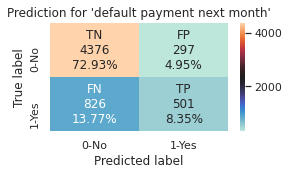

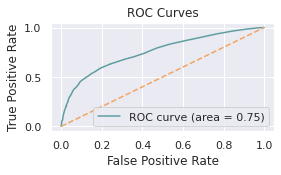

In [30]:
evaluate(y_pred_forest["Original"], y_prob_forest["Original"])

### Random Forest: SMOTE data 

              precision    recall  f1-score   support

  No Default       0.85      0.92      0.88      4673
     Default       0.59      0.41      0.49      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.79      6000

Accuracy: 80.80%
Confusion Matrix:


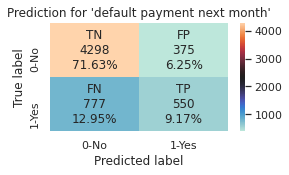

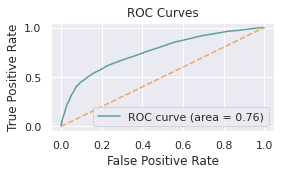

In [31]:
evaluate(y_pred_forest["SMOTE"], y_prob_forest["SMOTE"])

<a id="Model-AdaBoosting-eval"></a>
## Adaboost Evaluation

### Adaboost Evaluation: original data

              precision    recall  f1-score   support

  No Default       0.83      0.95      0.89      4673
     Default       0.66      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Accuracy: 81.52%
Confusion Matrix:


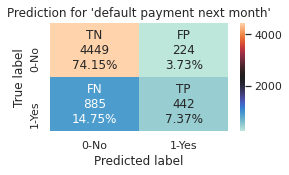

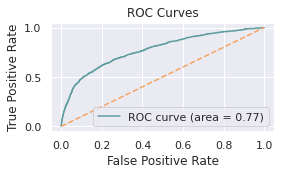

In [32]:
evaluate(y_pred_adaboost["Original"], y_prob_adaboost["Original"])

### Adaboost Evaluation: SMOTE data

              precision    recall  f1-score   support

  No Default       0.84      0.93      0.89      4673
     Default       0.63      0.39      0.48      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000

Accuracy: 81.37%
Confusion Matrix:


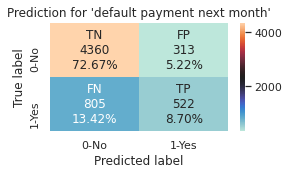

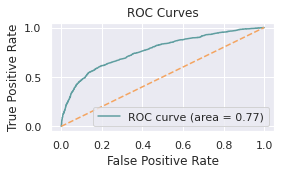

In [33]:
evaluate(y_pred_adaboost["SMOTE"], y_prob_adaboost["SMOTE"])

<a id="Model-NN-eval"></a>
## Neural Network Evaluation

### Neural Network: original data

              precision    recall  f1-score   support

  No Default       0.84      0.94      0.89      4673
     Default       0.66      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 82.00%
Confusion Matrix:


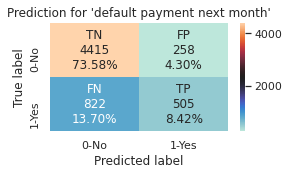

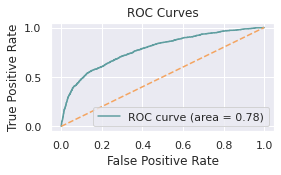

In [34]:
evaluate(y_pred_nn["Original"], y_prob_nn["Original"])

### Neural Network: SMOTE data

              precision    recall  f1-score   support

  No Default       0.86      0.87      0.86      4673
     Default       0.51      0.50      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Accuracy: 78.45%
Confusion Matrix:


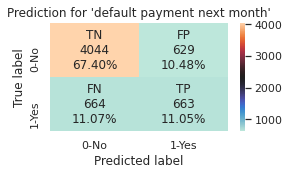

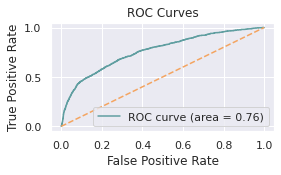

In [35]:
evaluate(y_pred_nn["SMOTE"], y_prob_nn["SMOTE"])

<a id="Model-SVM-eval"></a>
## SVM with RBF kernel Evaluation

### SVM with RBF kernel: original data

              precision    recall  f1-score   support

  No Default       0.84      0.95      0.89      4673
     Default       0.68      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Accuracy: 81.82%
Confusion Matrix:


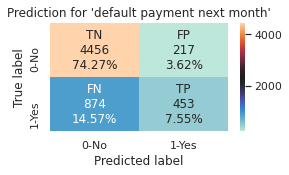

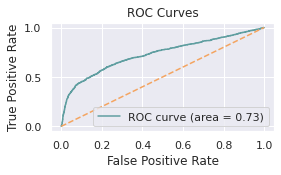

In [36]:
evaluate(y_pred_svm_rbf["Original"], y_prob_svm_rbf["Original"])

### SVM with RBF kernel: SMOTE data

              precision    recall  f1-score   support

  No Default       0.86      0.88      0.87      4673
     Default       0.54      0.50      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.79      6000

Accuracy: 79.63%
Confusion Matrix:


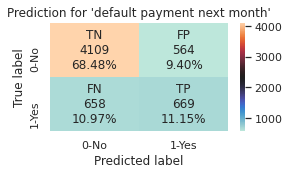

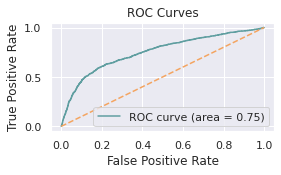

In [37]:
evaluate(y_pred_svm_rbf["SMOTE"], y_prob_svm_rbf["SMOTE"])